In [1]:
#Default Libraries:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#library for static graphs
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import statistics

# Data Import

In [2]:
titles = pd.read_csv("C:/Users/User/Documents/Sangeetha/Portfolio Project/Netflix/Data/titles.csv")
credits = pd.read_csv("C:/Users/User/Documents/Sangeetha/Portfolio Project/Netflix/Data/credits.csv")

In [69]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [70]:
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


# Data Analysis

In [71]:
titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [72]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [73]:
credits.describe()

,person_id
count,7.780100e+04
mean,5.294888e+05
std,6.430167e+05
min,7.000000e+00
25%,4.530600e+04
50%,1.983580e+05
75%,8.880960e+05
max,2.462818e+06


In [74]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


# Data Cleaning

In [75]:
titles.duplicated().sum()

0

In [77]:
titles.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [59]:
titles.dropna(subset=['title']) #dropping records with blank titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Taxi Driver,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Taxi Driver,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Taxi Driver,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,Taxi Driver,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Taxi Driver,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,Taxi Driver,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Taxi Driver,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Taxi Driver,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


In [101]:
titles[titles['genres']=='[]'] #displaying titles with []description


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
212,tm255589,One Last Shot,MOVIE,"In this low-budget short film, two best buddie...",1998,NaN,30,[],[],NaN,NaN,NaN,NaN,1.890000,5.2
619,tm341561,Like Twenty Impossibles,MOVIE,Occupied Palestine: A serene landscape now poc...,2003,NaN,16,[],['PS'],NaN,NaN,NaN,NaN,0.812000,6.5
632,ts86241,Le Robe De Mariage Des Cieux,SHOW,It was with much difficulty that Ai Qing was a...,2004,TV-MA,63,[],[],1.0,NaN,NaN,NaN,0.600000,NaN
636,tm404676,To and from New York,MOVIE,"While covering a story in New York City, a Sea...",2006,NaN,82,[],['US'],NaN,NaN,NaN,NaN,1.401000,5.8
637,tm89054,Osuofia in London 2,MOVIE,Osuofia return to his Nigerian village with a ...,2004,NaN,72,[],['XX'],NaN,NaN,NaN,NaN,1.091000,NaN
961,tm458034,BoJack Horseman Christmas Special,MOVIE,"It's Christmas, and BoJack wants nothing to do...",2014,NaN,25,[],['US'],NaN,NaN,NaN,NaN,1.566000,7.1
1061,tm132675,100 Things to Do Before High School,MOVIE,With the pressures of high school in their nea...,2014,NaN,44,[],['US'],NaN,NaN,NaN,NaN,0.009442,NaN
1111,ts271005,幸福料理,SHOW,NaN,2014,TV-14,44,[],[],1.0,NaN,NaN,NaN,0.600000,NaN
1628,tm860487,Pac’s Scary Halloween,MOVIE,Dr. Pacenstein and Eeghost are plotting to rui...,2016,NaN,44,[],['US'],NaN,NaN,NaN,NaN,1.989000,7.4
1704,tm1063792,NaN,MOVIE,NaN,2015,NaN,11,[],[],NaN,tt4661188,NaN,NaN,NaN,NaN


In [104]:
titles['genres'].replace({'[]':'NaN'}, inplace=True) #replacing with Null

In [105]:
titles[titles['genres']=='[]'] #verifing

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


In [99]:
titles[titles['production_countries']=='[]'] #displaying titles with production_countries=[]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
26,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],[],1.0,tt0202477,8.1,2151.0,1.487,7.0
212,tm255589,One Last Shot,MOVIE,"In this low-budget short film, two best buddie...",1998,NaN,30,[],[],NaN,NaN,NaN,NaN,1.890,5.2
471,tm418157,Monty Python Conquers America,MOVIE,This documentary follows the evolution of the ...,2008,NaN,55,['documentation'],[],NaN,tt19880958,NaN,NaN,2.177,6.5
554,tm87909,Thomas & Friends: Thomas and the Jet Engine,MOVIE,"Gordon brags that he's the fastest engine, but...",2004,G,67,"['animation', 'family']",[],NaN,NaN,NaN,NaN,1.751,8.0
557,ts56595,Cocomong,SHOW,"A little sausage becomes a monkey, an egg beco...",2008,TV-Y,13,['animation'],[],4.0,tt9892608,5.6,11.0,1.831,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5823,tm1099342,Devdas Brothers,MOVIE,"After their first heartbreaks, four jilted you...",2021,NaN,99,['drama'],[],NaN,tt12478372,3.3,51.0,NaN,NaN
5840,tm1216735,Sun of the Soil,MOVIE,"In 14th-century Mali, an ambitious young royal...",2022,NaN,26,[],[],NaN,NaN,NaN,NaN,1.179,7.0
5842,tm1066324,Super Monsters: Once Upon a Rhyme,MOVIE,The Super Monsters rethink exemplary fantasies...,2021,NaN,25,"['animation', 'family']",[],NaN,tt14586752,5.6,38.0,53.762,6.3
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN


In [109]:
titles['production_countries'].replace({'[]':'NaN'}, inplace=True) #replacing [] with NaN

In [110]:
titles[titles['production_countries']=='[]'] #verifying

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


In [111]:
credits.duplicated().sum()

0

In [112]:
credits.isnull().sum()

person_id       0
id              0
name            0
character    9772
role            0
dtype: int64

# Data Exploration

In [118]:
#creating seperate DF for movie titles
movies = titles

In [119]:
movies.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [120]:
#cleaning movies DF
movies.drop(["seasons"], axis=1, inplace = True)
movies.drop(["tmdb_popularity"], axis=1, inplace = True)
movies.drop(["tmdb_score"], axis=1, inplace = True)

In [121]:
movies.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],tt0068473,7.7,107673.0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],tt0071853,8.2,534486.0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",tt0061578,7.7,72662.0


In [124]:
movies.drop(index= movies[movies['type']== 'SHOW'].index) #removing shows

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],tt0068473,7.7,107673.0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],tt0071853,8.2,534486.0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",tt0061578,7.7,72662.0
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],tt0079470,8.0,395024.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5844,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,NaN,35,NaN,['US'],NaN,NaN,NaN
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],tt13857480,6.8,45.0
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],NaN,tt11803618,7.7,348.0
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0


In [126]:
#creating seperate DF for Shows
shows = titles

In [128]:
shows.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],tt0068473,7.7,107673.0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],tt0071853,8.2,534486.0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",tt0061578,7.7,72662.0


In [129]:
shows.drop(index= shows[shows['type']== 'MOVIE'].index) #removing movies

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],NaN,NaN,NaN
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],tt0063929,8.8,73424.0
26,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],NaN,tt0202477,8.1,2151.0
35,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],['US'],tt0098904,8.9,308824.0
44,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,"['scifi', 'action', 'crime', 'drama']",['US'],tt0083437,6.9,34115.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5828,ts319608,The Family That Sings Together: The Camargos,SHOW,"Surrounded by family and friends, Zezé Di Cama...",2021,NaN,39,"['documentation', 'music', 'reality']",['BR'],tt16260968,5.3,45.0
5830,ts288861,Let's Eat,SHOW,A food-blogging insurance agent encounters a f...,2021,TV-14,60,"['drama', 'comedy']",['TH'],tt15978704,8.2,5.0
5831,ts273317,Pitta Kathalu,SHOW,"Four different women, four journeys of love an...",2021,TV-MA,37,"['drama', 'romance']",['IN'],tt13878800,5.1,738.0
5833,ts307884,HQ Barbers,SHOW,When a family run barber shop in the heart of ...,2021,TV-14,24,['comedy'],['NG'],NaN,NaN,NaN


# Data Analysis

# Movies Vs Shows Production in 21st Centuary

In [130]:
df1=titles[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})

In [131]:
df1.head()

,type,Release Year
0,SHOW,1945
1,MOVIE,1976
2,MOVIE,1972
3,MOVIE,1975
4,MOVIE,1967


In [142]:
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>2000]#filtering data to get 21st century data

In [143]:
df2.head()

,Release Year,type,Total Content
60,2001,MOVIE,14
61,2001,SHOW,6
62,2002,MOVIE,13
63,2002,SHOW,9
64,2003,MOVIE,22


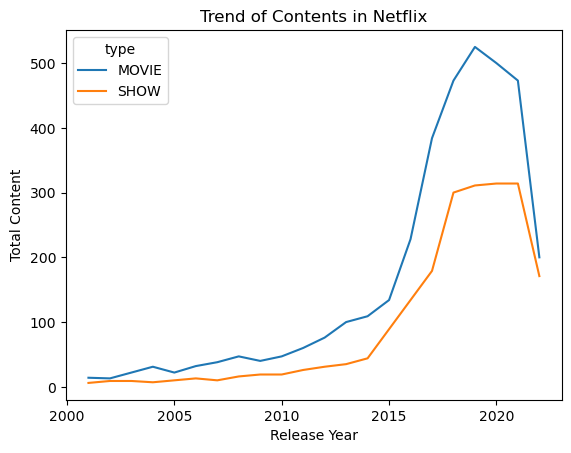

In [146]:
sns.lineplot(x='Release Year',y='Total Content',data=df2, hue='type')
plt.title("Trend of Contents in Netflix")
plt.show()

# Distribution of Content Ratings

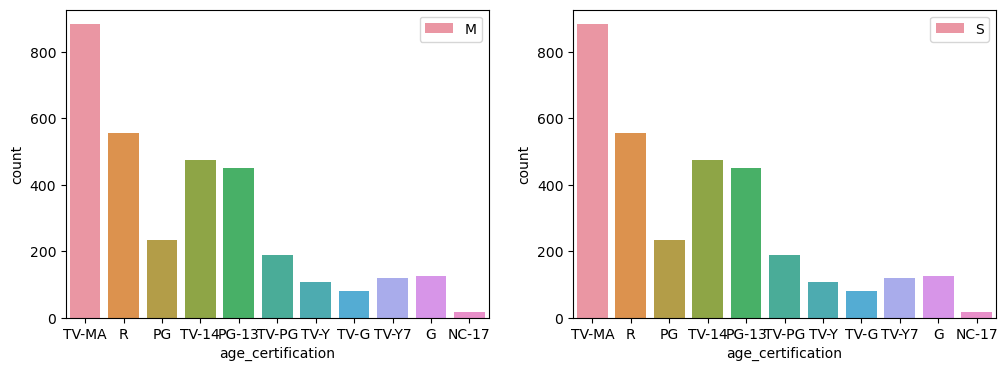

In [190]:
fig,ax= plt.subplots(1,2) #1 row 2 columns
fig.set_size_inches(12,4)
sns.countplot(x="age_certification",data=movies,ax=ax[0])
sns.countplot(x="age_certification",data=shows,ax=ax[1])
ax[0].legend("M")
ax[1].legend("S")
fig.show()

# Content Runtime Analysis

In [192]:
shows_runtime_max= max(shows.runtime)
shows_runtime_min= min(shows[shows.runtime >0].runtime) #ignoring 0 runtime 

movies_runtime_max= max(movies.runtime)
movies_runtime_min= min(movies[movies.runtime >0].runtime)

shows_avg= statistics.mean(shows.runtime)
movies_avg= statistics.mean(movies.runtime)

In [194]:
print(f"The average duration for a show on netflix is {int(shows_avg)} minutes. \nThe maximum duration is {shows_runtime_max} minutes. \nThe minimum duration is {shows_runtime_min} minutes.")
print("\n")
print(f"The average duration for a movie on netflix is {int(movies_avg)} minutes. \nThe maximum duration is {movies_runtime_max} minutes. \nThe minimum duration is {movies_runtime_min} minutes.")

The average duration for a show on netflix is 76 minutes. 
The maximum duration is 240 minutes. 
The minimum duration is 2 minutes.


The average duration for a movie on netflix is 76 minutes. 
The maximum duration is 240 minutes. 
The minimum duration is 2 minutes.


# Genere Analysis

In [240]:
def convert_to_series(dataframe):
    genres = []
    for row in dataframe["genres"]:
        row_modified = row.replace("[", "").replace("]", "").replace("'", "").split(",")
        for genre in row_modified:
            genres.append(genre)
   
    genres_df = pd.DataFrame(genres)
    return genres_df

In [241]:
movie_genres = convert_to_series(movies) #creating new DF for movie genres

In [242]:
movie_genres= movie_genres.rename(columns={0:'genres'})
movie_genres=movie_genres.groupby(['genres']).size().reset_index(name='Total Movies')

In [243]:
movie_genres

,genres,Total Movies
0,action,792
1,animation,388
2,comedy,1020
3,crime,698
4,documentation,287
5,drama,1547
6,european,443
7,family,569
8,fantasy,542
9,history,233


In [226]:
show_genres = convert_to_series(shows) #creating new DF for show genres

In [227]:
show_genres= show_genres.rename(columns={0:'genres'})
show_genres= show_genres.groupby(['genres']).size().reset_index(name='Total Shows')
show_genres

,genres,Total Shows
0,action,792
1,animation,388
2,comedy,1020
3,crime,698
4,documentation,287
5,drama,1547
6,european,443
7,family,569
8,fantasy,542
9,history,233


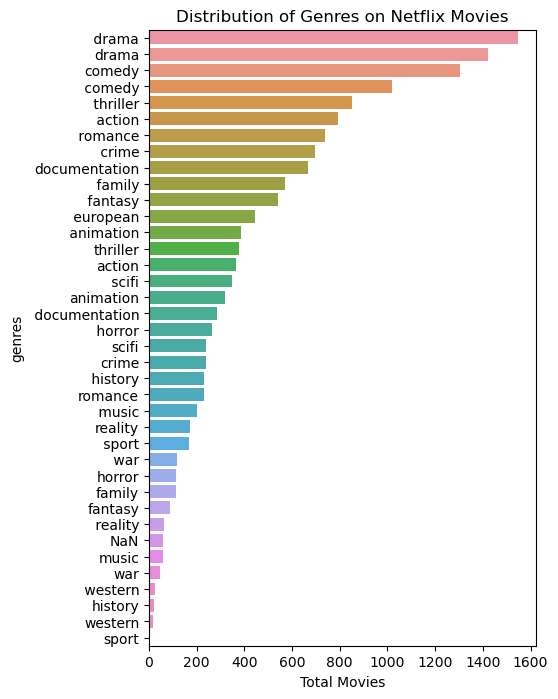

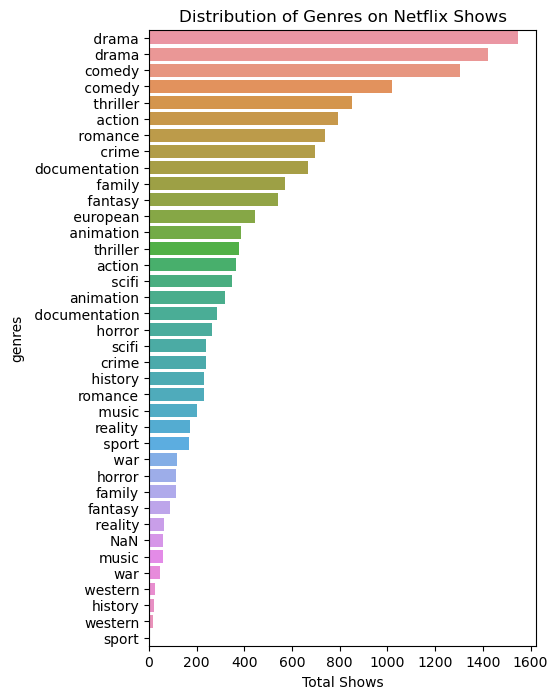

In [245]:
plt.figure(figsize=(11,8))
plt.subplot(1,2,1) #Movies Subplot
sns.barplot(x=movie_genres["Total Movies"], y=movie_genres["genres"], data=movie_genres, order=movie_genres.sort_values('Total Movies',ascending = False).genres)
plt.title("Distribution of Genres on Netflix Movies")

plt.figure(figsize=(11,8))
plt.subplot(1,2,2) #Shows Subplot
sns.barplot(x=show_genres["Total Shows"], y=show_genres["genres"], data=show_genres, order=show_genres.sort_values('Total Shows',ascending = False).genres)
plt.title("Distribution of Genres on Netflix Shows")

plt.show()


# Top 10 Actors in Netflix

In [278]:
#Creating new DF for actors
actor_credits = credits

actor_credits.drop(index= actor_credits[actor_credits['role']== 'DIRECTOR'].index) 

actor_credits= actor_credits.groupby(['name']).size().reset_index(name='Total Content')
actor_credits=actor_credits.sort_values(by=['Total Content'],ascending=False)
actor_credits=actor_credits.head(10)
actor_credits

,name,Total Content
6756,Boman Irani,25
26329,Kareena Kapoor Khan,25
45901,Shah Rukh Khan,23
48770,Takahiro Sakurai,21
41869,Raúl Campos,20
39170,Paresh Rawal,20
2671,Amitabh Bachchan,20
40938,Priyanka Chopra Jonas,20
21610,Jan Suter,19
25802,Junichi Suwabe,19


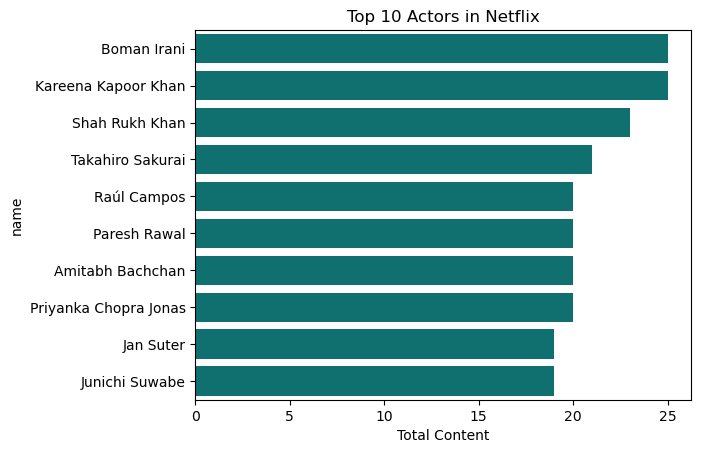

In [280]:
sns.barplot(x='Total Content',y='name', data=actor_credits, color='teal')
plt.title("Top 10 Actors in Netflix")
plt.show()

# Top 10 Directors in Netflix

In [281]:
director_credits= credits
director_credits= director_credits.drop(index= director_credits[director_credits['role']== 'ACTOR'].index) 

director_credits= director_credits.groupby(['name']).size().reset_index(name='Total Content')
director_credits= director_credits.sort_values(by=['Total Content'],ascending=False)
director_credits= director_credits.head(10)
director_credits

,name,Total Content
2590,Raúl Campos,20
1246,Jan Suter,19
2751,Ryan Polito,17
1281,Jay Karas,15
1968,Marcus Raboy,14
483,Cathy Garcia-Molina,12
1279,Jay Chapman,12
3389,Youssef Chahine,11
1549,Justin G. Dyck,8
1733,Kunle Afolayan,8


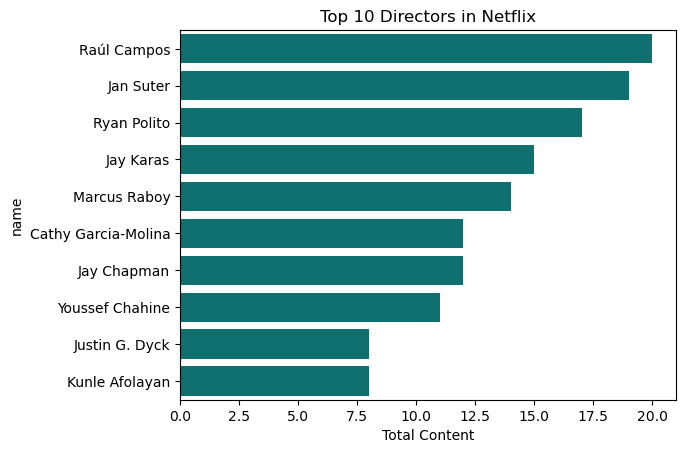

In [282]:
sns.barplot(x='Total Content',y='name', data=director_credits, color='teal')
plt.title("Top 10 Directors in Netflix")
plt.show()